# Competition: Modulation format classification

Wellcome to this years MLOC competition!
If you have any questions, don't hesitate to ask a question in the forum or send an email to sisi.miao@kit.edu or benedikt.geiger@kit.edu.

Have fun!

Enter your team name here:

In [16]:
# Before you start, please enter your team name!
team_name = 'REFERENCE_NN'

The main code starts here...

In [17]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [18]:
# In case you want to use PyTorch to build your clasifier
import torch
import torch.nn as nn
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("We are using the following device for learning:",device)

We are using the following device for learning: cuda


In [19]:
# helper function to compute the classification error rate.
def CER(predictions, labels):
    """Calculates the classification error rate."""
    return (np.sum(predictions != labels) / len(predictions))

In [20]:
# Checks if the data you upload has the correct type/form
def check_predictions(test_data, predictions, valid_values):
    """Checks if predictions has the right length and type."""
    if isinstance(predictions,np.ndarray):
        print('type ok.')
    else:
        raise Exception('wrong type, predictions should be of type np.ndarray')
    if predictions.ndim != 1:
        raise Exception('wrong dimension, predictions must have dim 1')
    else:
        print('dim ok.')
    if len(test_data) != len(predictions):
        raise Exception('wrong length, "X_test" and "predictions" must have the same length.')
    else:
        print('length ok.')
    all_values_valid = True
    for i in range(len(predictions)):
        if (predictions[i] not in valid_values):
            print('All values of "predictions" have to be in "valid data".')
            all_values_valid = False
            break
    if all_values_valid:
        print('Predictions are valid values.')

## Task 1: Distinguish between multiple modulation formats
You are given samples of an unknown modulation format and your task is to determine the modulation format in order to setup the receiver correctly. Design an ML system that estimates the modulation format from the traces (supervised learning, classification task). To evaluate the performance, carry out the classification separately for each SNR and show the performance for each SNR point.

Show the classification error for the validation set for each SNR point separately.

Load datasets. They are stored as a pickle file.

The dataset contains traces of 128 complex samples (Inphase and Quadrature component) of received signals with different modulation formats and at different signal-to-noise ratios (SNRs). The goal is to estimate the modulation format and/or the SNR from the traces.

The array `X_train` contains the traces (the examples). The corresponding labels (the modulation format) are given by `y_train` and the corresponding SNR is given in `SNR_train`. The label in `y_train` corresponds to one of the modulation formats in `modulation_formats`.

In [21]:
# Download data sets if they are not available
from os.path import exists
import urllib.request
    
if not exists('MLOC_Competition_2024_task1_dataset_train.pkl'):
    print('Downloading data set file 1/3, please wait ... ', end='')
    urllib.request.urlretrieve('https://bwsyncandshare.kit.edu/s/cWxMnpcTLmwKaMm/download?files=MLOC_Competition_2024_task1_dataset_train.pkl', 'MLOC_Competition_2024_task1_dataset_train.pkl')        
    print('done')

if not exists('MLOC_Competition_2024_task1_dataset_valid.pkl'):
    print('Downloading data set file 2/3, please wait ... ', end='')
    urllib.request.urlretrieve('https://bwsyncandshare.kit.edu/s/cWxMnpcTLmwKaMm/download?files=MLOC_Competition_2024_task1_dataset_valid.pkl', 'MLOC_Competition_2024_task1_dataset_valid.pkl')        
    print('done')

if not exists('MLOC_Competition_2024_task1_test_data.pkl'):
    print('Downloading data set file 3/3, please wait ... ', end='')
    urllib.request.urlretrieve('https://bwsyncandshare.kit.edu/s/cWxMnpcTLmwKaMm/download?files=MLOC_Competition_2024_task1_test_data.pkl', 'MLOC_Competition_2024_task1_test_data.pkl')        
    print('done')

In [22]:
# Load training dataset
with open('MLOC_Competition_2024_task1_dataset_train.pkl', "rb") as f:
    X_train_task_1 = pickle.load(f)
    y_train_task_1 = pickle.load(f)
    SNR_train_task_1 = pickle.load(f)
    modulation_formats_task_1 = pickle.load(f)
    SNRs_task_1 = pickle.load(f)
    
# Load validation dataset
with open('MLOC_Competition_2024_task1_dataset_valid.pkl', "rb") as f:
    X_valid_task_1 = pickle.load(f)
    y_valid_task_1 = pickle.load(f)
    SNR_valid_task_1 = pickle.load(f) 
    
# Load test data
with open('MLOC_Competition_2024_task1_test_data.pkl', "rb") as f:
    X_test_task_1 = pickle.load(f)

In [23]:
print('Modulation formats: ', modulation_formats_task_1)
print('SNR values: ', SNRs_task_1)

Modulation formats:  ['QPSK', '8-ASK', '16-PSK', '16-QAM']
SNR values:  [ 0  2  4  6  8 10 12 14 16 18]


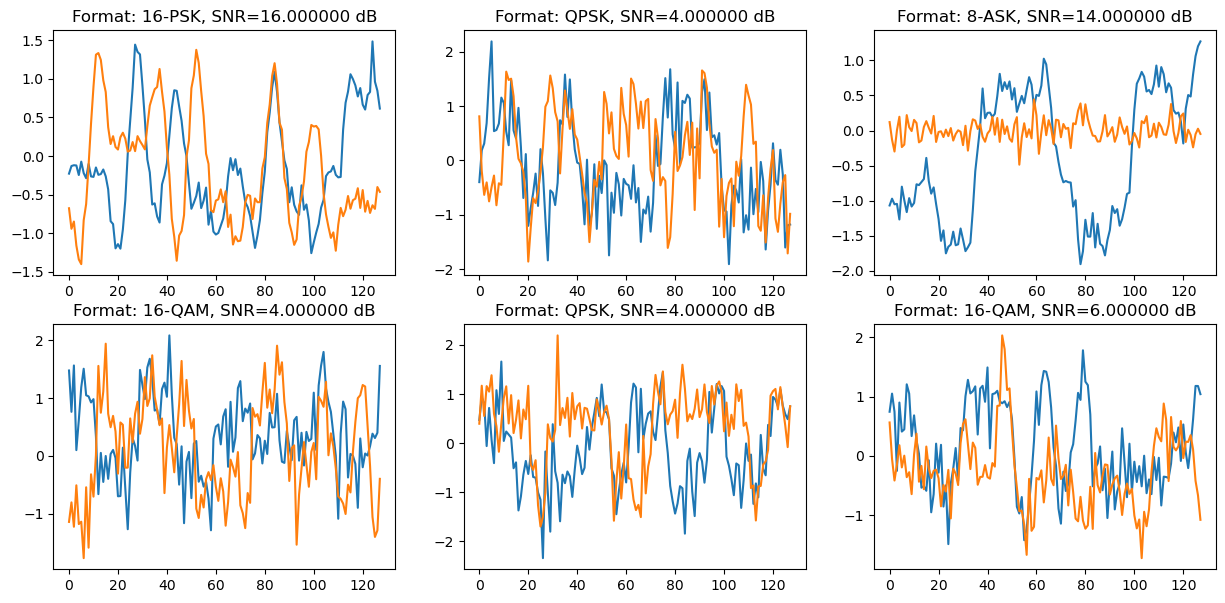

In [24]:
starti = np.random.randint(0,X_train_task_1.shape[0]-7)
plt.figure(figsize=(15,7))
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.plot(np.real(X_train_task_1[k+starti,:]))
    plt.plot(np.imag(X_train_task_1[k+starti,:]))
    plt.title('Format: %s, SNR=%f dB' % (modulation_formats_task_1[y_train_task_1[k+starti]], SNR_train_task_1[k+starti]))

In [ ]:
### possible solution here ###
### Student version here ###




# This snippet should help you plot your results.
idx_SNR_valid = []   
error_rates_all_SNR = np.empty([len(SNRs_task_1)])
for SNR in range(len(SNRs_task_1)):
    idx_SNR_valid.append(np.asarray(np.where(SNR_valid_task_1 == SNRs_task_1[SNR])))    
# Save the performance (CER) for each SNR point in 'error_rates_all_SNR'
### Student version here ###



In [ ]:
# Plot Results
plt.figure(figsize=(5,3))
plt.plot(SNRs_task_1, error_rates_all_SNR)
plt.axis('tight')
plt.xlabel('SNR (dB)')
plt.xlim((0,18))
plt.ylim((0.001,1))
plt.ylabel('Classification error')
plt.grid(which='both')
plt.yscale('log')
plt.savefig('Competition_Task1_Reference.pdf', bbox_inches='tight')

In [ ]:
# Load test data
with open('MLOC_Competition_2024_task1_test_data.pkl', "rb") as f:
    X_test_task_1 = pickle.load(f)

# Prepare data
### Student version here ###



# Send test data through the NN, output should be 'predictions_task_2'
### Student version here ###



### Don't touch this part
check_predictions(X_test_task_1, predictions_task_1, range(len(modulation_formats_task_1)))

with open('Task_1_%s.pkl' % (team_name),'wb') as f:
    pickle.dump(predictions_task_1,f)